In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
dis_stock = pd.read_csv("DIS.csv")

In [61]:
dis_info = pd.read_excel("Conference.xlsx", parse_dates = [1])

In [62]:
dis_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1963-12-09,0.104013,0.104013,0.103049,0.104013,0.067646,428300
1,1963-12-10,0.104655,0.105618,0.104655,0.104655,0.068063,389300
2,1963-12-11,0.104655,0.105297,0.104334,0.104655,0.068063,389300
3,1963-12-12,0.104655,0.105297,0.104334,0.105297,0.068481,545100
4,1963-12-13,0.102728,0.102728,0.102086,0.102728,0.066976,545100


In [63]:
dis_info.head()

,title,rel_date,an_std
0,Academy Award Review of Walt Disney Cartoons,"May 19, 1937",Walt Disney Animation Studios
1,Snow White and the Seven Dwarfs,"December 21, 1937",Walt Disney Animation Studios
2,Pinocchio,"February 7, 1940",Walt Disney Animation Studios
3,Fantasia,"November 13, 1940",Walt Disney Animation Studios
4,Dumbo,"October 23, 1941",Walt Disney Animation Studios


In [64]:
rel_date_bad = dis_info['rel_date']
rel_date_bad.head()

0         May 19, 1937
1    December 21, 1937
2     February 7, 1940
3    November 13, 1940
4     October 23, 1941
Name: rel_date, dtype: object

In [65]:
bad_list = []
for element in rel_date_bad.values:
    bad_list.append(element)
bad_list

['May 19, 1937',
 'December 21, 1937',
 'February 7, 1940',
 'November 13, 1940',
 'October 23, 1941',
 'August 13, 1942',
 'August 24, 1942',
 'July 17, 1943',
 'December 21, 1944',
 'April 20, 1946',
 'November 12, 1946',
 'September 27, 1947',
 'May 27, 1948',
 'October 5, 1949',
 'February 15, 1950',
 'July 28, 1951',
 'February 5, 1953',
 'June 22, 1955',
 'January 29, 1959',
 'January 25, 1961',
 'December 25, 1963',
 'October 18, 1967',
 'December 24, 1970',
 'November 8, 1973',
 'March 11, 1977',
 'June 22, 1977',
 'July 10, 1981',
 'July 24, 1985',
 'July 2, 1986',
 'June 22, 1988',
 'November 18, 1988',
 'November 17, 1989',
 'August 3, 1990',
 'November 16, 1990',
 'November 22, 1991',
 'November 25, 1992',
 'October 29, 1993',
 'June 15, 1994',
 'April 7, 1995',
 'June 23, 1995',
 'November 22, 1995',
 'April 12, 1996',
 'June 21, 1996',
 'June 27, 1997',
 'June 19, 1998',
 'November 25, 1998',
 'March 26, 1999',
 'June 18, 1999',
 'November 24, 1999',
 'December 17, 1999',

In [66]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
good_list = []
for element in bad_list:
    a = element.split(" ")
    month = a[0]
    day = a[1][0:a[1].find(',')]
    year = a[2]
    month_number = months.index(month) + 1
    if month_number <= 9:
        month_number = '0'+ str(month_number)
    date = year + '-'+ str(month_number) + '-' + day
    good_list.append(date)

In [67]:
dis_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13596 entries, 0 to 13595
Data columns (total 7 columns):
Date         13596 non-null object
Open         13596 non-null float64
High         13596 non-null float64
Low          13596 non-null float64
Close        13596 non-null float64
Adj Close    13596 non-null float64
Volume       13596 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 743.6+ KB


In [68]:
# Stocks data are now in date_time
dis_stock_dates = pd.to_datetime(dis_stock['Date'])
dis_stock['Date'] = dis_stock_dates

In [69]:
dis_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1963-12-09,0.104013,0.104013,0.103049,0.104013,0.067646,428300
1,1963-12-10,0.104655,0.105618,0.104655,0.104655,0.068063,389300
2,1963-12-11,0.104655,0.105297,0.104334,0.104655,0.068063,389300
3,1963-12-12,0.104655,0.105297,0.104334,0.105297,0.068481,545100
4,1963-12-13,0.102728,0.102728,0.102086,0.102728,0.066976,545100


In [70]:
good_dates = pd.to_datetime(good_list, format = '%Y-%m-%d', errors = 'coerce')

In [71]:
good_dates = pd.Series(good_dates)

In [72]:
# Now dis_info is with proper date
dis_info['rel_date'] = good_dates

In [73]:
dis_info.head()

,title,rel_date,an_std
0,Academy Award Review of Walt Disney Cartoons,1937-05-19,Walt Disney Animation Studios
1,Snow White and the Seven Dwarfs,1937-12-21,Walt Disney Animation Studios
2,Pinocchio,1940-02-07,Walt Disney Animation Studios
3,Fantasia,1940-11-13,Walt Disney Animation Studios
4,Dumbo,1941-10-23,Walt Disney Animation Studios


In [107]:
dis_info_aproper_dates = dis_info[dis_info['rel_date'] >= pd.to_datetime('1963-12-09', format = '%Y-%m-%d')]

In [108]:
dis_info_aproper_dates = dis_info_aproper_dates.reset_index()

In [111]:
dis_info_aproper_dates.drop(['index'], axis = 1)

,title,rel_date,an_std
0,The Sword in the Stone,1963-12-25,Walt Disney Animation Studios
1,The Jungle Book,1967-10-18,Walt Disney Animation Studios
2,The Aristocats,1970-12-24,Walt Disney Animation Studios
3,Robin Hood,1973-11-08,Walt Disney Animation Studios
4,The Many Adventures of Winnie the Pooh,1977-03-11,Walt Disney Animation Studios
5,The Rescuers,1977-06-22,Walt Disney Animation Studios
6,The Fox and the Hound,1981-07-10,Walt Disney Animation Studios
7,The Black Cauldron,1985-07-24,Walt Disney Animation Studios
8,The Great Mouse Detective,1986-07-02,Walt Disney Animation Studios
9,Who Framed Roger Rabbit,1988-06-22,Amblin Entertainment


In [ ]:
del dis_info_aproper_dates['index']

In [125]:
dis_info_aproper_dates.columns = ['title', 'Date', 'an_std']
dis_info_aproper_dates.columns

Index(['title', 'Date', 'an_std'], dtype='object')

In [128]:
dis_info_aproper_dates

,title,Date,an_std
0,The Sword in the Stone,1963-12-25,Walt Disney Animation Studios
1,The Jungle Book,1967-10-18,Walt Disney Animation Studios
2,The Aristocats,1970-12-24,Walt Disney Animation Studios
3,Robin Hood,1973-11-08,Walt Disney Animation Studios
4,The Many Adventures of Winnie the Pooh,1977-03-11,Walt Disney Animation Studios
5,The Rescuers,1977-06-22,Walt Disney Animation Studios
6,The Fox and the Hound,1981-07-10,Walt Disney Animation Studios
7,The Black Cauldron,1985-07-24,Walt Disney Animation Studios
8,The Great Mouse Detective,1986-07-02,Walt Disney Animation Studios
9,Who Framed Roger Rabbit,1988-06-22,Amblin Entertainment


In [126]:
s1 = pd.merge(dis_info_aproper_dates, dis_stock, how='inner', on=['Date'])

In [127]:
s1

,title,Date,an_std,Open,High,Low,Close,Adj Close,Volume
0,The Jungle Book,1967-10-18,Walt Disney Animation Studios,0.269662,0.270304,0.261958,0.263884,0.176550,1674300
1,The Aristocats,1970-12-24,Walt Disney Animation Studios,0.708826,0.711395,0.701122,0.707542,0.477347,1888400
2,Robin Hood,1973-11-08,Walt Disney Animation Studios,1.289242,1.335470,1.284106,1.299515,0.876723,1776500
3,The Many Adventures of Winnie the Pooh,1977-03-11,Walt Disney Animation Studios,0.798714,0.806418,0.791009,0.791009,0.533658,1615900
4,The Rescuers,1977-06-22,Walt Disney Animation Studios,0.747350,0.752486,0.737077,0.749918,0.505935,1869000
5,The Fox and the Hound,1981-07-10,Walt Disney Animation Studios,1.209628,1.227605,1.209628,1.227605,0.828209,666800
6,The Black Cauldron,1985-07-24,Walt Disney Animation Studios,1.808021,1.808021,1.779771,1.782339,1.287431,9228200
7,The Great Mouse Detective,1986-07-02,Walt Disney Animation Studios,4.458416,4.458416,4.376233,4.407051,3.216752,3851100
8,Who Framed Roger Rabbit,1988-06-22,Amblin Entertainment,5.239152,5.331607,5.239152,5.269970,3.887869,10997400
9,Oliver & Company,1988-11-18,Walt Disney Animation Studios,5.054241,5.115878,5.054241,5.105605,3.778555,4236800


In [148]:
s1.to_excel('Disney_nedeed.xlsx')

In [149]:
s1['Open'].plot()

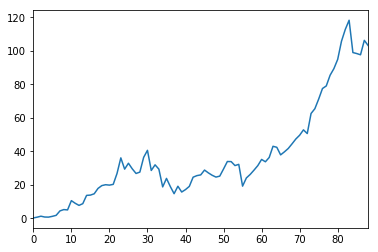

In [150]:
plt.show()